添加去极化噪声和使用量子测量，在给定最优参数的条件下，计算损失值并继续训练，看与实际解的差距

In [1]:
# 导入必要的库

import matplotlib.pyplot as plt

import pennylane as qml
from pennylane import numpy as qml_np

import numpy as np
import time
import VQLS_Noise_until

In [2]:
# 参数设置
steps = 30  # 迭代次数
eta = 0.1  # 学习率
seed = 1024 # 种子数
tol = 1e-4 # 终止条件
deep_layer = 3 # 电路层数
qubits = 3

qml_np.random.seed(1024)

# 变分量子电路最优参数
w_old = qml_np.array([3.14161205e+00,  5.80377608e+00,  3.93857269e+00,
         4.71236102e+00,  4.42799279e+00,  5.32962513e+00,
         2.88556879e-05, -6.91562619e-02,  4.79375314e-01])

# 进行随机的微小的扰动
error = qml_np.random.uniform(low=-0.01, high=0.01, size=(deep_layer * qubits,))

w = qml_np.array(w_old + error)
print(error)
print(w)
# 优化器
# opt = qml.GradientDescentOptimizer(stepsize=0.1)
opt = qml.AdamOptimizer(stepsize=0.1)


[ 0.00295382  0.00993827  0.00037607  0.00316225  0.00198127  0.00506135
 -0.00727506 -0.00991766 -0.00700982]
[ 3.14456587  5.81371435  3.93894876  4.71552327  4.42997406  5.33468648
 -0.0072462  -0.07907392  0.47236549]


In [3]:
cost_history = []
w_history = []
for it in range(steps):
    print("step  = ", it)
    
    start = time.time()
    
    w, cost = opt.step_and_cost(VQLS_Noise_until.cost_loc, w)
    w_history.append(w)
    cost_history.append(cost)
    
    end = time.time()
    
    print("Cost_L = {:9.7f}".format(cost))
    print("time = ", end - start)

    if cost < tol:
        break    

step  =  0
Cost_L = 0.0059363
time =  527.2517046928406
step  =  1
Cost_L = 0.3291438
time =  753.9824802875519
step  =  2
Cost_L = 0.2117908
time =  664.4307773113251
step  =  3
Cost_L = 0.1311979
time =  579.6730546951294
step  =  4
Cost_L = 0.0876587
time =  550.474288225174
step  =  5
Cost_L = 0.0641618
time =  563.908016204834
step  =  6
Cost_L = 0.0514247
time =  603.5589730739594
step  =  7
Cost_L = 0.0452860
time =  835.2861680984497
step  =  8
Cost_L = 0.0434786
time =  720.0982217788696
step  =  9
Cost_L = 0.0440909
time =  638.5334348678589
step  =  10
Cost_L = 0.0451792
time =  695.1699457168579
step  =  11
Cost_L = 0.0450527
time =  658.35693359375
step  =  12
Cost_L = 0.0427563
time =  910.415182352066
step  =  13
Cost_L = 0.0383130
time =  669.6668577194214
step  =  14
Cost_L = 0.0325458
time =  740.5252056121826
step  =  15
Cost_L = 0.0266090
time =  739.271947145462
step  =  16
Cost_L = 0.0214946
time =  754.8628849983215
step  =  17
Cost_L = 0.0177127
time =  835.2437

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


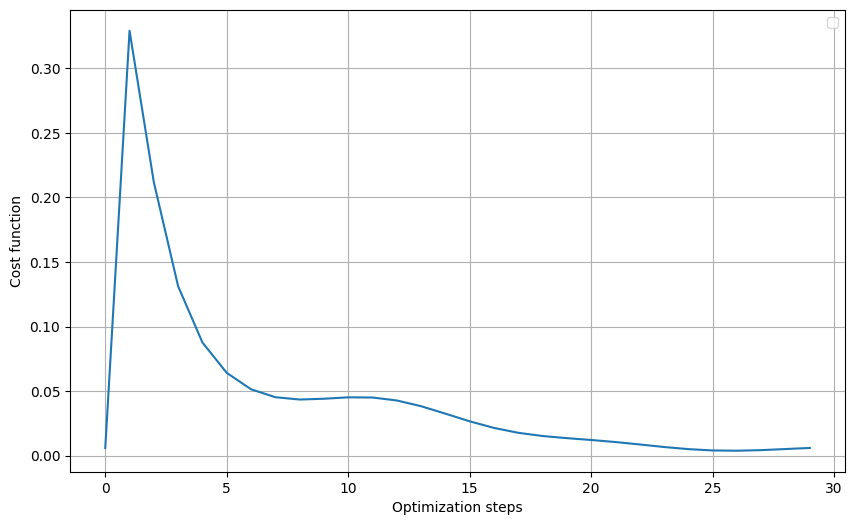

In [15]:
# 创建图形和轴
plt.figure(figsize=(10, 6))

# 绘制折线图
plt.plot(range(len(cost_history)), cost_history)

# 添加标题和标签
plt.ylabel("Cost function")
plt.xlabel("Optimization steps")
plt.grid()
plt.legend()
# 显示图形
plt.show()

In [21]:
x_normalized = VQLS_Noise_until.x_normalized
H_matrix_2 = VQLS_Noise_until.H_matrix_2
b_norm = VQLS_Noise_until.b_norm
qubits = 3

# 表示经典情况下，量子态在每个基向量上的概率
c_probs = (x_normalized) ** 2

# 获得量子电路上的测量概率，测量 2048 次
shots=2048
q_probs = VQLS_Noise_until.prepare_and_sample(w, noise_x=0.001)
print("c_probs = ", c_probs)
print("q_probs = ", q_probs)


c_probs =  [0.         0.         0.         0.80898876 0.14044944 0.0505618
 0.         0.        ]
q_probs =  [0.00878906 0.31103516 0.00732422 0.44140625 0.0859375  0.05761719
 0.08251953 0.00537109]


In [22]:
x_state_sample = np.sqrt(q_probs)

x_value = np.sqrt((H_matrix_2 @ x_state_sample.reshape(-1,1)).conj().T @ (H_matrix_2 @ x_state_sample.reshape(-1,1)))
x_state_sample_value = b_norm * x_state_sample/x_value

print("x_state_sample = ", x_state_sample)
print("x_state_sample_value= ", x_state_sample_value)


x_state_sample =  [0.09375    0.55770526 0.08558165 0.66438411 0.29315098 0.2400358
 0.28726213 0.07328775]
x_state_sample_value=  [[121.25016677 721.29979412 110.6857524  859.27130172 379.14246206
  310.4467343  371.52619895  94.78561552]]


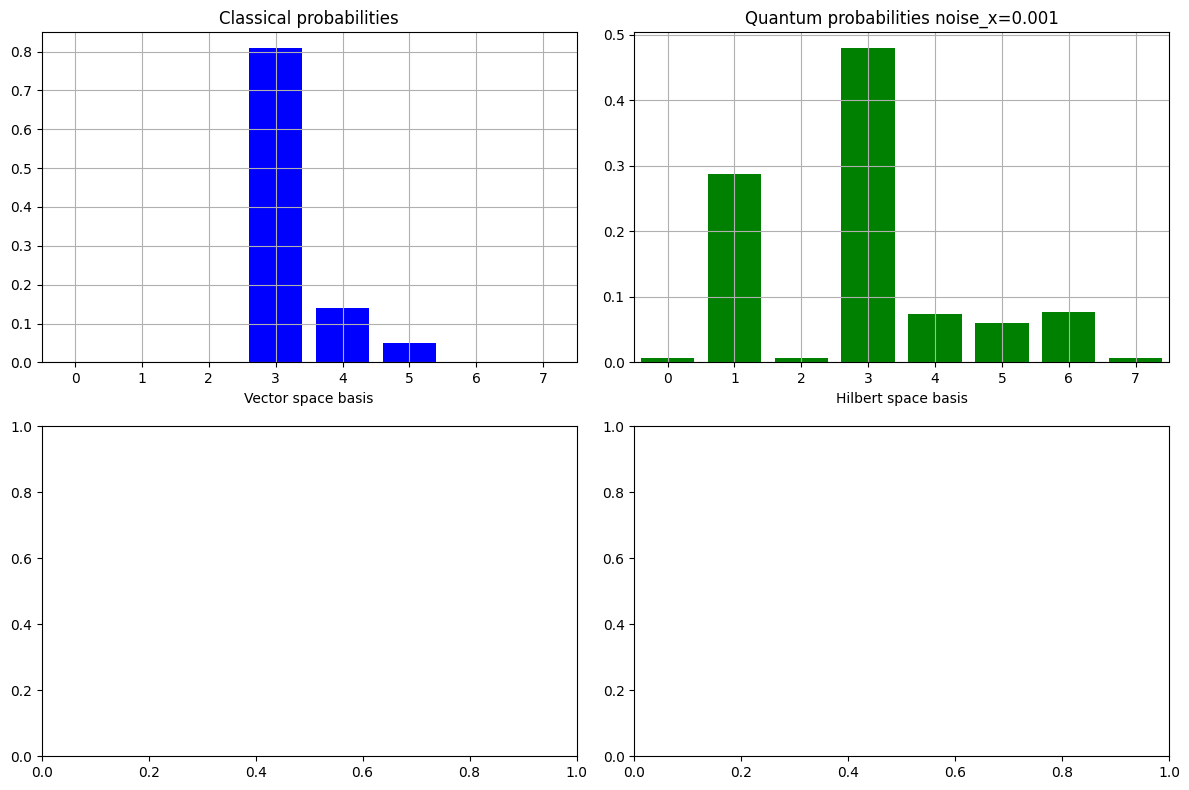

In [14]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.bar(np.arange(0, 2 ** qubits), c_probs, color="blue")
ax1.set_xlim(-0.5, 2 ** qubits - 0.5)
ax1.set_xlabel("Vector space basis")
ax1.set_title("Classical probabilities")
ax1.grid(True)  

ax2.bar(np.arange(0, 2 ** qubits), q_probs, color="green")
ax2.set_xlim(-0.5, 2 ** qubits - 0.5)
ax2.set_xlabel("Hilbert space basis")
ax2.set_title("Quantum probabilities noise_x=0.001")
ax2.grid(True)


# 调整布局以防止子图重叠
plt.tight_layout()
plt.show()

In [19]:
print("cost_history = ", cost_history)
print("w_history = ", w_history)

cost_history =  [0.005936323712917246, 0.329143767987524, 0.21179081776686243, 0.13119786642137854, 0.08765871032337358, 0.06416179684876844, 0.051424672139945116, 0.04528600903584107, 0.043478559196934774, 0.04409093528645358, 0.045179204567134534, 0.04505268406434054, 0.042756250382621874, 0.03831295652567801, 0.03254576591231939, 0.026609010127289445, 0.021494570190283002, 0.01771270092780497, 0.015219060446798216, 0.013560826029175632, 0.012153237439183617, 0.010562973595600211, 0.008679836699170052, 0.006715872765878761, 0.0050556652841831085, 0.0040460552890227985, 0.0038294848760423994, 0.004291398415678438, 0.005127485889844019, 0.0059761445981301176]
w_history =  [tensor([3.0445659 , 5.91371431, 3.83894938, 4.61552355, 4.32997408,
        5.23468651, 0.09275379, 0.02092605, 0.57236545], requires_grad=True), tensor([3.05007106, 5.92830693, 3.9114679 , 4.62274348, 4.27548262,
        5.14497876, 0.07978899, 0.09416087, 0.58695807], requires_grad=True), tensor([3.0815823 , 5.9240

In [18]:
w_history[-1]

tensor([ 3.38703632,  5.7479508 ,  4.01636212,  3.24634907,  4.70685735,
         4.18882633, -0.02817045, -0.19982191,  0.40660194], requires_grad=True)